In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *
from my_utils import *
import random
from IPython.display import clear_output
import time

In [2]:
#%matplotlib notebook

def QFM(t,vp,**kwargs):
  delay = kwargs.get("delay",5e-9)
  vcc = kwargs.get("vcc",3.3)
  c = 10e-12
  r = 3.3e3
  dt = t[1]-t[0]
  uc = t * 0
  logic_out = t * 0
  uc[0] = 0
  
  wait = 0
  triggered = 0

  charge_state = 0
  wait_state      = 1
    
  state = charge_state
    
  for i in range(0,len(t)-1):
    
    
    if (uc[i] < vp[i]) and (state == charge_state): # not hit the threshold from above
      i_chr = (vcc-uc[i])/r
      uc[i+1] = uc[i] + i_chr*dt/c
    else: # hit the threshold from above
      uc[i+1] = 0
      logic_out[i+1] = 1
      if state == charge_state:
        wait = delay
        state = wait_state
    
    if state == wait_state:
      wait = wait - dt
        
    if (wait <= 0):
      wait = 0
      state = charge_state
    
    
  return (logic_out, uc)


In [3]:
t = np.linspace(0,600e-9,100000)
vp = t*0 +0.5


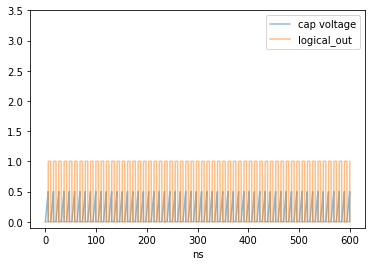

In [4]:
logic_out, uc = QFM(t,vp)

plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(-0.1,3.5)
plt.legend()
#plt.xlim(0,100)
plt.show()



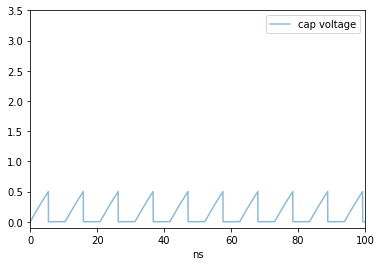

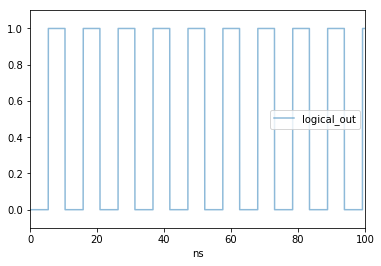

In [5]:
logic_out, uc = QFM(t,vp)

plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
#plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(-0.1,3.5)
plt.legend()
plt.xlim(0,100)
plt.show()

#plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(-0.1,1.1)
plt.legend()
plt.xlim(0,100)
plt.show()



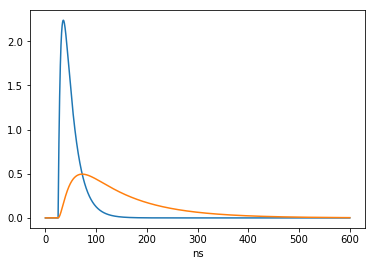

In [6]:
Q = 1500e-12
tau1 = 6e-9
tau2 = 20e-9
modulation  = detector_signal_function(t, Q, tau1, tau2, 25e-9)


R=1e3
C=100e-12
mod_rc = RC_filter(t,modulation,R,C)

plt.plot(t*1e9,modulation)
plt.plot(t*1e9,mod_rc)
plt.xlabel("ns")
plt.show()



# use filtered modulation

modulation = mod_rc

In [7]:


def myplot(phase):
  clear_output(wait=True)
  dummy, new_modulation = shift_time(t,modulation,phase)
  logic_out, uc = QFM(t,vp+new_modulation)

  dummy, uc = shift_time(t,uc,-phase)
  dummy, logic_out = shift_time(t,logic_out,-phase)


  n_start_edge = 1
  n_stop_edge  = 40+1

  tle = nth_edge_time(t,logic_out,n_start_edge)
  tte = nth_edge_time(t,logic_out,n_stop_edge)

  width = tte-tle

  TDC_in = (t>tle) *(t<tte)
  
  plt.plot(t*1e9,uc,alpha=0.8,label="cap voltage")
  plt.plot(t*1e9,vp+modulation,alpha=0.8,label="v_bias+modulation")
  #plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
  plt.plot(t*1e9,logic_out*0.2-0.3,alpha=0.8,label="logical out",color="red")
  plt.plot(t*1e9,TDC_in*0.2-0.3-0.3,alpha=0.8,label="TDC_in, width={:3.3f}ns".format(width*1e9))
  plt.xlabel("ns")
  plt.ylabel("voltage (V)")
  plt.ylim(-0.65,1.35)
  plt.legend()
  plt.xlim(0,550)
  save_animation_frame(plt)
  plt.show()
  #time.sleep(0.03)



saving to /workdir/jupyter/misc_mw/QFMv2_calculations/pulse_on_animation_anim/019.png


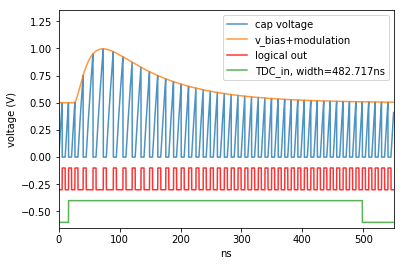

In [8]:
clear_animation_cache()
for phase in np.linspace(10e-9,0,20):
  myplot(phase)

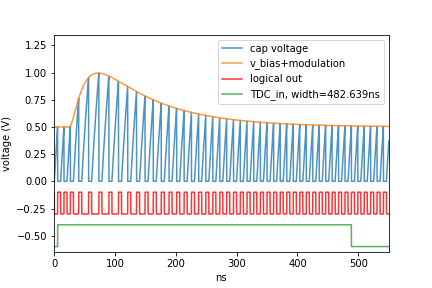

In [9]:
make_gif()